# __Feature Engineering__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction to Feature Engineering
- Feature Engineering Methods
- Transforming Variables
  * Log Transformation
  * Square Root Transformation
  * Box-Cox Transformation
- Features Scaling
- Label Encoding
- One Hot Encoding
- Hashing
    * Hashlib Module
- Grouping Operations

## __1. Introduction to Feature Engineering__
It refers to the process of selecting, modifying, or creating new features (variables) from the raw data to improve the performance of machine learning models.
- It involves transforming the data into a more suitable format, making it easier for models to learn patterns and make accurate predictions.
- It is a critical step in the data preprocessing pipeline and plays a key role in the success of machine learning projects.



## __2. Feature Engineering Methods__

They introduce the concept of creating new features through mathematical operations, transformations, or combining existing variables.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Feature_Engineering_Methods.png)

__Note:__ The __Data Wrangling__ lesson extensively addresses various feature engineering methods, including outlier handling, imputation, and data cleaning. Any aspects not covered in that lesson but deemed essential for feature engineering are comprehensively discussed here.

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("../data/HousePrices.csv")

In [2]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Create a new feature 'total_rooms' by adding bedrooms and bathrooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_rooms
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,7.50
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.25
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,6.50


## __3. Transforming Variables__
Transforming variables is a crucial aspect of feature engineering that involves modifying the scale, distribution, or nature of variables to meet certain assumptions or to make them more suitable for analysis or modeling.
- Here are a few common techniques for transforming variables:
1. Log transformation
2. Square root transformation
3. Box-cox transformation


### __3.1 Log Transformation__

Log transformation is useful for handling skewed data or reducing the impact of outliers. It applies the natural logarithm to the variable values and makes highly skewed distributions less skewed.

In [4]:
# Logarithmic transformation of the 'price' column
df['log_price'] = df['price'].apply(np.log)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,total_rooms,log_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50,12.653958
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,7.50,14.684290
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00,12.742566
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5.25,12.948010
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,6.50,13.217674


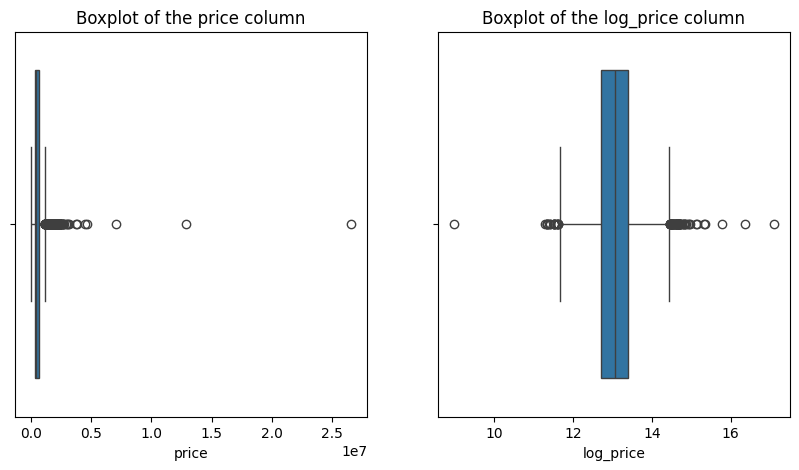

In [5]:
# Create boxplot for the 'price' and 'log_price' columns
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='price', data=df, ax=ax[0])
sns.boxplot(x='log_price', data=df, ax=ax[1])
ax[0].set_title('Boxplot of the price column')
ax[1].set_title('Boxplot of the log_price column')
plt.show()

### __3.2 Square Root Transformation__
Square root transformation, like log transformation, effectively stabilizes variance and addresses skewed distributions. Although it's gentler than log transformation, it achieves the same objective.

In [7]:
# Square root transforming the 'price' variable
df['SquareRoot_price'] = df['price'].apply(np.sqrt)
# Displaying the DataFrame with the new feature
print("DataFrame with square root transformed 'price':")
df[['price', 'SquareRoot_price']].head()

DataFrame with square root transformed 'price':


,price,SquareRoot_price
0,313000.0,559.464029
1,2384000.0,1544.020725
2,342000.0,584.807661
3,420000.0,648.074070
4,550000.0,741.619849


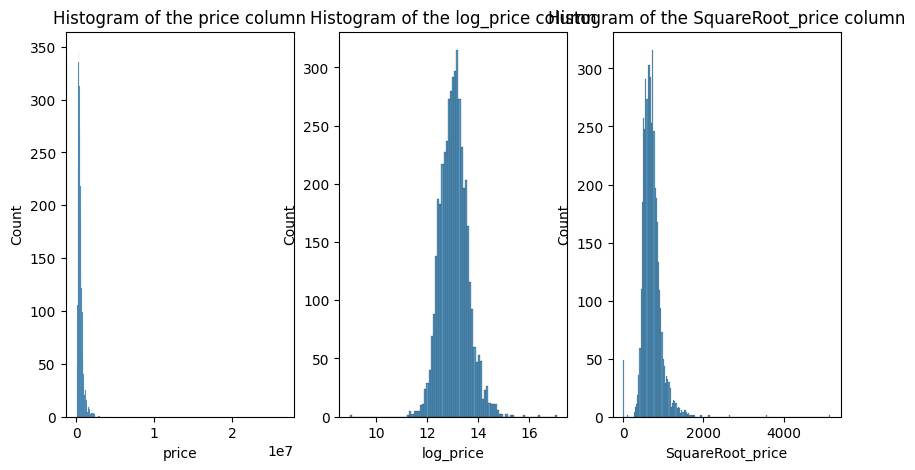

In [8]:
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(df['price'], ax=ax[0])
sns.histplot(df['log_price'], ax=ax[1])
sns.histplot(df['SquareRoot_price'], ax=ax[2])
ax[0].set_title('Histogram of the price column')
ax[1].set_title('Histogram of the log_price column')
ax[2].set_title('Histogram of the SquareRoot_price column')
plt.show()

### __3.3 Box-Cox Transformation__

The box-cox transformation is a family of power transformations that includes log and square root transformations.
- It can handle a broader range of data distributions.

- Ensuring positive data is crucial for the Box-Cox transformation because it involves taking the logarithm, which is undefined for zero or negative values. Adding a constant helps avoid mathematical errors and ensures the transformation can be applied effectively.

In [9]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sales' variable
df['BoxCox_sqft'], best_lambda = boxcox(df['sqft_living'])

# Displaying the DataFrame with the Box-Cox transformed 'sales' variable
print("DataFrame with box-cox transformed price:")
df[['sqft_living', 'BoxCox_sqft']].head()

DataFrame with box-cox transformed price:


,sqft_living,BoxCox_sqft
0,1340,8.270696
1,3650,9.609817
2,1930,8.752434
3,2000,8.799831
4,1940,8.759306


0.037642104833800136


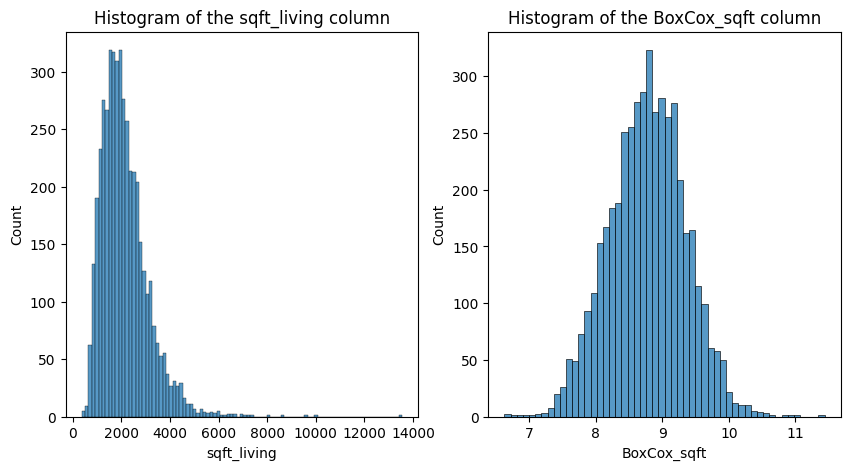

In [10]:
print(best_lambda)
# Create histogram for the 'sqft_living' and 'BoxCox_sqft' columns
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['sqft_living'], ax=ax[0])
sns.histplot(df['BoxCox_sqft'], ax=ax[1])
ax[0].set_title('Histogram of the sqft_living column')
ax[1].set_title('Histogram of the BoxCox_sqft column')
plt.show()

## __4. Feature Scaling__
Feature scaling is a technique used in machine learning and data preprocessing to standardize or normalize the range of independent variables or features of a dataset.

- Min-max scaling transforms data to a specific range, typically between 0 and 1, preserving the relative differences between values. This normalization technique is ideal for datasets with known bounds, ensuring that all values are rescaled proportionally to fit within the specified range.

- Standard scaling is preferable for normally distributed data to maintain mean-centeredness and consistent standard deviations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_10_Feature_Engineering/Label_Encoding.png)

In [11]:
# Normalization using sickit-learn
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['sqft_living_scaled', 'sqft_lot_scaled']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot']])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,total_rooms,log_price,SquareRoot_price,BoxCox_sqft,sqft_living_scaled,sqft_lot_scaled
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,4.50,12.653958,559.464029,8.270696,0.073652,0.006775
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,7.50,14.684290,1544.020725,9.609817,0.249051,0.007835
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5.00,12.742566,584.807661,8.752434,0.118451,0.010534
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,5.25,12.948010,648.074070,8.799831,0.123766,0.006885
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,6.50,13.217674,741.619849,8.759306,0.119210,0.009186


In [12]:
# Standardization using sickit-learn
from sklearn.preprocessing import StandardScaler

# Scaling numeric features using standard scaling
standard_sc = StandardScaler()
df[['sqft_living_standard', 'sqft_lot_standard']] = standard_sc.fit_transform(df[['sqft_living', 'sqft_lot']])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,statezip,country,total_rooms,log_price,SquareRoot_price,BoxCox_sqft,sqft_living_scaled,sqft_lot_scaled,sqft_living_standard,sqft_lot_standard
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,WA 98133,USA,4.50,12.653958,559.464029,8.270696,0.073652,0.006775,-0.829971,-0.193434
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,WA 98119,USA,7.50,14.684290,1544.020725,9.609817,0.249051,0.007835,1.568528,-0.161718
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,WA 98042,USA,5.00,12.742566,584.807661,8.752434,0.118451,0.010534,-0.217367,-0.080978
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,WA 98008,USA,5.25,12.948010,648.074070,8.799831,0.123766,0.006885,-0.144686,-0.190145
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,WA 98052,USA,6.50,13.217674,741.619849,8.759306,0.119210,0.009186,-0.206984,-0.121306


## __5. Label Encoding__

Label encoding is a technique used to convert categorical labels into a numeric format, making it suitable for machine learning algorithms that require numerical input.
- In label encoding, each unique category is assigned an integer value.
- This is particularly useful when dealing with ordinal categorical data, where the order of categories matters.

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'size': ['small', 'medium', 'large', 'medium', 'small']}
df2 = pd.DataFrame(data)

# Before label encoding
print("Original DataFrame:")
df2.head()

Original DataFrame:


,size
0,small
1,medium
2,large
3,medium
4,small


In [14]:
# Apply label encoding
label_encoder = LabelEncoder()
df2['size_encoded'] = label_encoder.fit_transform(df2['size'])

# After label encoding
print("\nDataFrame after label encoding:")
df2.head()


DataFrame after label encoding:


,size,size_encoded
0,small,2
1,medium,1
2,large,0
3,medium,1
4,small,2


In [15]:
label_encoder.transform(['small', 'medium', 'large'])

array([2, 1, 0])

In [16]:
# Create one hot encoding for the 'size' column
df2n = pd.get_dummies(df2['size'])
df2 = df2.merge(df2n, left_index=True, right_index=True)
df2.head()


,size,size_encoded,large,medium,small
0,small,2,False,False,True
1,medium,1,False,True,False
2,large,0,True,False,False
3,medium,1,False,True,False
4,small,2,False,False,True


In [17]:
# Demonstrating label encoding using csv file
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'city' column
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,country,total_rooms,log_price,SquareRoot_price,BoxCox_sqft,sqft_living_scaled,sqft_lot_scaled,sqft_living_standard,sqft_lot_standard,city_encoded
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,USA,4.50,12.653958,559.464029,8.270696,0.073652,0.006775,-0.829971,-0.193434,36
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,USA,7.50,14.684290,1544.020725,9.609817,0.249051,0.007835,1.568528,-0.161718,35
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,USA,5.00,12.742566,584.807661,8.752434,0.118451,0.010534,-0.217367,-0.080978,18
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,USA,5.25,12.948010,648.074070,8.799831,0.123766,0.006885,-0.144686,-0.190145,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,USA,6.50,13.217674,741.619849,8.759306,0.119210,0.009186,-0.206984,-0.121306,31


In [18]:
# use one hot encoding for the 'city' column
df_one_hot = pd.get_dummies(df['city'])
df = pd.concat([df, df_one_hot], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,False,False,True,False,False,False,False,False,False,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,False,True,False,False,False,False,False,False,False,False
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Other solution, without sickit-learn
df['city_encoded_v2'] = df['city'].astype('category').cat.codes
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,city_encoded_v2
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,False,True,False,False,False,False,False,False,False,36
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,True,False,False,False,False,False,False,False,False,35
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,18
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,False,False,False,False,False,False,False,False,False,31


In [25]:
# Other solution, without sickit-learn
my_cities = df['city'].unique()
my_cities_labels = {city: i for i, city in enumerate(my_cities)}
df['city_encoded_v3'] = df['city'].map(my_cities_labels)
df.head()

{'Shoreline': 0, 'Seattle': 1, 'Kent': 2, 'Bellevue': 3, 'Redmond': 4, 'Maple Valley': 5, 'North Bend': 6, 'Lake Forest Park': 7, 'Sammamish': 8, 'Auburn': 9, 'Des Moines': 10, 'Bothell': 11, 'Federal Way': 12, 'Kirkland': 13, 'Issaquah': 14, 'Woodinville': 15, 'Normandy Park': 16, 'Fall City': 17, 'Renton': 18, 'Carnation': 19, 'Snoqualmie': 20, 'Duvall': 21, 'Burien': 22, 'Covington': 23, 'Inglewood-Finn Hill': 24, 'Kenmore': 25, 'Newcastle': 26, 'Mercer Island': 27, 'Black Diamond': 28, 'Ravensdale': 29, 'Clyde Hill': 30, 'Algona': 31, 'Skykomish': 32, 'Tukwila': 33, 'Vashon': 34, 'Yarrow Point': 35, 'SeaTac': 36, 'Medina': 37, 'Enumclaw': 38, 'Snoqualmie Pass': 39, 'Pacific': 40, 'Beaux Arts Village': 41, 'Preston': 42, 'Milton': 43}


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,city_encoded_v2,city_encoded_v3
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,True,False,False,False,False,False,False,False,36,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,False,False,False,False,False,False,False,False,35,1
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,False,False,False,False,False,False,False,False,18,2
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,False,False,False,False,False,False,False,False,3,3
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,False,False,False,False,False,False,False,False,31,4


## __6. One-Hot Encoding__

One-hot encoding is a technique to represent categorical variables as binary vectors.
- It is particularly useful when dealing with nominal categorical data, where there is no inherent order among categories.
- In one-hot encoding, each unique category is transformed into a binary column, and only one column in each set of binary columns is _hot_ (or 1) to indicate the presence of that category.

- It increases dataset dimensionality, facilitating categorical data representation. However, it can lead to increased complexity and computational overhead.

In [30]:
import pandas as pd

# Sample DataFrame
data = {'color': ['red', 'blue', 'green', 'red', 'green']}
df3 = pd.DataFrame(data)

# Before one-hot encoding
print("Original DataFrame:")
df3

Original DataFrame:


,color
0,red
1,blue
2,green
3,red
4,green


In [36]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df3['color'])
df3 = pd.concat([df3, df_encoded], axis=1) # Can drop_first=True to avoid multicollinearity
# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
df3


DataFrame after one-hot encoding:


,color,blue,green,red,blue,green,red
0,red,False,False,True,False,False,True
1,blue,True,False,False,True,False,False
2,green,False,True,False,False,True,False
3,red,False,False,True,False,False,True
4,green,False,True,False,False,True,False


In [39]:
# REad housing data
df = pd.read_csv("../data/HousePrices.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [40]:
# Demonstrating one-hot encoding using csv file
# One-Hot Encoding for the 'view' column
df_encode = pd.get_dummies(df['view'], drop_first=True)
df = pd.concat([df, df_encode], axis=1)
# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
df.head()


DataFrame after one-hot encoding:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,1,2,3,4
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False,False,False,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,1921,0,709 W Blaine St,Seattle,WA 98119,USA,False,False,False,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False,False,False,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,False,False,False,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False,False,False,False


In [41]:
# Same, using sickit-learn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
tr = enc.fit_transform(df[['view']])
print(tr)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4600 stored elements and shape (4600, 5)>
  Coords	Values
  (0, 0)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (4575, 0)	1.0
  (4576, 0)	1.0
  (4577, 0)	1.0
  (4578, 0)	1.0
  (4579, 0)	1.0
  (4580, 0)	1.0
  (4581, 0)	1.0
  (4582, 0)	1.0
  (4583, 0)	1.0
  (4584, 0)	1.0
  (4585, 0)	1.0
  (4586, 0)	1.0
  (4587, 0)	1.0
  (4588, 4)	1.0
  (4589, 0)	1.0
  (4590, 0)	1.0
  (4591, 0)	1.0
  (4592, 0)	1.0
  (4593, 0)	1.0
  (4594, 0)	1.0
  (4595, 0)	1.0
  (4596, 0)	1.0
  (4597, 0)	1.0
  (4598, 0)	1.0
  (4599, 0)	1.0


In [42]:
print(enc.categories_)

[array([0, 1, 2, 3, 4])]


In [43]:
print(enc.categories_[0])

[0 1 2 3 4]


In [44]:
tr.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(4600, 5))

In [48]:
df_encode2= df.copy()
# Convert the encoded array back to a DataFrame and change the column names to the original categories
df_encode2[enc.categories_[0]] = tr.toarray()
df_encode2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,1,2,3,4,0
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,0.0,0.0,0.0,0.0,1.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,0.0,0.0,0.0,1.0,0.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0.0,0.0,0.0,0.0,1.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,0.0,0.0,0.0,0.0,1.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,0.0,0.0,0.0,0.0,1.0


In [49]:
df_encode2.shape

(4600, 23)

In [52]:
# Add one hot encoding for the 'city' column
one_hot_city_encoder = OneHotEncoder()
tr_city = one_hot_city_encoder.fit_transform(df[['city']])
df_encode3 = df.copy()
df_encode3[one_hot_city_encoder.categories_[0]] = tr_city.toarray()
print(df_encode3.head())
print(df_encode3.shape)


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...  SeaTac  Seattle  Shoreline  \
0     1.5           0     0          3  ...     0.0      0.0        1.0   
1     2.0           0     4          5  ...     0.0      1.0        0.0   
2     1.0           0     0          4  ...     0.0      0.0        0.0   
3     1.0           0     0          4  ...     0.0      0.0        0.0   
4     1.0           0     0          4  ...     0.0      0.0        0.0   

   Skykomish Snoqualmie Snoqualmie Pass Tukwila Vashon  Woodin

## __7. Hashing__

It is a technique to convert input data (of variable length) into a fixed-length string of characters, typically a hash code.
- The hash function takes an input (or message) and returns a fixed-size string of characters, which is typically a hexadecimal number.
- It is commonly used for indexing data structures, checking data integrity, and hashing passwords.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Updated_Images/Lesson_10/10_01/Lesson_10_Feature_EngineeringHashing.jpg)

In [53]:
# Example of hashing in Python
data = "Hello, Hashing!"

# Using the hash() function
hash_value = hash(data)

print(f"Original data: {data}")
print(f"Hash value: {hash_value}")

Original data: Hello, Hashing!
Hash value: 2971638635415439876


In [54]:
# Demonstrating hashing using csv file
# Hashing for the 'street' column
df['street_hashed'] = df['street'].apply(hash)
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,1,2,3,4,street_hashed
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False,False,False,False,-2653261151099352446
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,False,False,False,True,1513491163734226382
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False,False,False,False,6092762363363562757
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,False,False,False,False,2304809112768148999
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,False,False,False,False,-5723489799919629695
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,...,1994,522 NE 88th St,Seattle,WA 98115,USA,False,False,False,False,-6699879952336445073
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,...,0,2616 174th Ave NE,Redmond,WA 98052,USA,False,False,False,False,-5152756201743648153
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,...,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,False,False,False,False,2825942821538391681
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,...,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,False,False,False,False,4093387073920116713
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,...,2010,6811 55th Ave NE,Seattle,WA 98115,USA,False,False,False,False,-6704926195833384908


### __7.1 Hashlib Module__

The hashlib module in Python is used for generating hash values. It offers interfaces to different cryptographic hash algorithms like MD5, SHA-1, SHA-256, SHA-384, and SHA-512.

- It enables the efficient use of hash functions, ensuring secure computations.
- It provides reliability for hash-related operations.
- It is widey used for cryptographic operations, data integrity, and password hashing.
- It ensures convenience and robustness.



Cryptographic hash algorithms vary in hash size and security levels.

- For tasks where security is not a critical concern, you can opt for MD5 or SHA-1. However, it's important to note that both algorithms are deprecated due to vulnerabilities.

- For security-sensitive applications, it's advisable to prioritize SHA-256, SHA-384, or SHA-512 due to their stronger security and larger hash sizes.

In [55]:
# Example of hashlib module in Python
import hashlib

# Input data
data = b'Hello, world!'
print(f"Original data: {data.decode()} \n")

# Calculate MD5 hash
md5_hash = hashlib.md5(data).hexdigest()
print("MD5 Hash:", md5_hash)

# Calculate SHA-1 hash
sha1_hash = hashlib.sha1(data).hexdigest()
print("SHA-1 Hash:", sha1_hash)

# Calculate SHA-256 hash
sha256_hash = hashlib.sha256(data).hexdigest()
print("SHA-256 Hash:", sha256_hash)

# Calculate SHA-384 hash
sha384_hash = hashlib.sha384(data).hexdigest()
print("SHA-384 Hash:", sha384_hash)

# Calculate SHA-512 hash
sha512_hash = hashlib.sha512(data).hexdigest()
print("SHA-512 Hash:", sha512_hash)


Original data: Hello, world! 

MD5 Hash: 6cd3556deb0da54bca060b4c39479839
SHA-1 Hash: 943a702d06f34599aee1f8da8ef9f7296031d699
SHA-256 Hash: 315f5bdb76d078c43b8ac0064e4a0164612b1fce77c869345bfc94c75894edd3
SHA-384 Hash: 55bc556b0d2fe0fce582ba5fe07baafff035653638c7ac0d5494c2a64c0bea1cc57331c7c12a45cdbca7f4c34a089eeb
SHA-512 Hash: c1527cd893c124773d811911970c8fe6e857d6df5dc9226bd8a160614c0cd963a4ddea2b94bb7d36021ef9d865d5cea294a82dd49a0bb269f51f6e7a57f79421


In this example, the `hashlib` module is imported and input data is provided in bytes format. Hash values are then computed using the md5(), sha1(), sha256(), sha384(), and sha512() functions, and their hexadecimal representations are obtained using hexdigest().

In [56]:
# Demonstrating MD5 hash function using csv file for the 'street' column

street_column = df['street']
hashed_streets = street_column.apply(lambda x: hashlib.md5(x.encode()).hexdigest())

# Replace the original street values with hash values
df['hashed_street'] = hashed_streets

# Optionally, write the updated DataFrame back to a CSV file
df.to_csv('hashed_file.csv', index=False)

df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,1,2,3,4,street_hashed,hashed_street
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,False,False,False,False,-2653261151099352446,6dfce6ba342c1453d53f4fbad459190f
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,False,False,False,True,1513491163734226382,eca9bb465b9b6f538c3c8354f463a914
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False,False,False,False,6092762363363562757,f28aaaaf79810e27de8be497f141e983
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,False,False,False,False,2304809112768148999,57b51c9b4274c3310f4bb6ee86e238fa
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,False,False,False,False,-5723489799919629695,0f4f6aaeea3eca19264763a7b472d25c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,501 N 143rd St,Seattle,WA 98133,USA,False,False,False,False,2068166741920328588,379a041108472c400b0bf6b7d74a8a7d
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,14855 SE 10th Pl,Bellevue,WA 98007,USA,False,False,False,False,-3651748210821678569,0ea89e25733395d9b2b939faac4177e7
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,759 Ilwaco Pl NE,Renton,WA 98059,USA,False,False,False,False,7685795266306327112,1eb91d567557f6eeba1710631b73dc3c
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,5148 S Creston St,Seattle,WA 98178,USA,False,False,False,False,6671737408573236675,72a210cd0de2505e5b5b40b6897fe46e


## __8. Grouping Operations__

Grouping operations involve splitting a dataset into groups based on some criteria, applying a function to each group independently, and then combining the results.
- This is a crucial step in data analysis and manipulation, allowing for insights into the data at a more granular level.
- Grouping operations are commonly combined with aggregate functions to summarize data within each group.

In [57]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
        'Revenue': [500, 300, 700, 400, 600]}

df4 = pd.DataFrame(data)
df4

,Category,Revenue
0,Electronics,500
1,Clothing,300
2,Electronics,700
3,Clothing,400
4,Electronics,600


In [60]:
grouped_df = df4.groupby('Category')
grouped_df.head()

,Category,Revenue
0,Electronics,500
1,Clothing,300
2,Electronics,700
3,Clothing,400
4,Electronics,600


In [64]:
# Grouping by 'Category' and calculating total revenue for each category
revenues = grouped_df['Revenue'].sum()

print("\nGrouped DataFrame with total revenue:")
print(type(revenues))
print(revenues.head())


Grouped DataFrame with total revenue:
<class 'pandas.core.series.Series'>
Category
Clothing        700
Electronics    1800
Name: Revenue, dtype: int64


In [67]:
# Grouping by 'city' and calculating the average price
df_grouped_city = df.groupby('city')
df_grouped_city.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,1,2,3,4,street_hashed,hashed_street
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,False,False,False,False,-2653261151099352446,6dfce6ba342c1453d53f4fbad459190f
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,False,False,False,True,1513491163734226382,eca9bb465b9b6f538c3c8354f463a914
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False,False,False,False,6092762363363562757,f28aaaaf79810e27de8be497f141e983
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,False,False,False,False,2304809112768148999,57b51c9b4274c3310f4bb6ee86e238fa
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,False,False,False,False,-5723489799919629695,0f4f6aaeea3eca19264763a7b472d25c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,2014-06-26 00:00:00,224000.0,3.0,1.75,1500,11968,1.0,0,0,3,...,32428-32598 5th Ave,Black Diamond,WA 98010,USA,False,False,False,False,-7349156657344599766,04c2d4a508d801b0312f0ad4fdb58008
3598,2014-06-27 00:00:00,415000.0,3.0,2.75,2600,64626,1.5,0,0,3,...,69506 NE Money Creek Rd,Skykomish,WA 98288,USA,False,False,False,False,-3874174129206991261,d1c3c057c6d2119ed8320e3adb74409a
4112,2014-07-08 00:00:00,250000.0,3.0,1.75,1140,10400,1.0,0,0,4,...,1705 Douglas Ct,Milton,WA 98354,USA,False,False,False,False,2072381877960670609,b2c587aa6c06f5f3d302f8a859c3b2e4
4184,2014-07-09 00:00:00,150000.0,3.0,0.75,490,38500,1.5,0,0,4,...,11881 Tye River Rd NE,Skykomish,WA 98288,USA,False,False,False,False,1523248320749998647,3fb3a96ff4825f7403815e35e0336a46


In [68]:
# Grouping by 'city' and calculating the average price
average_price = df_grouped_city['price'].mean()
average_price.head()

city
Algona                207288.000000
Auburn                299340.442766
Beaux Arts Village    745000.000000
Bellevue              847180.662995
Black Diamond         339605.555556
Name: price, dtype: float64

In [69]:
# Grouping by 'city' and calculating the minimum price
df_grouped_min = df_grouped_city['price'].min()
df_grouped_min.head()

city
Algona                100000.0
Auburn                     0.0
Beaux Arts Village    745000.0
Bellevue                   0.0
Black Diamond              0.0
Name: price, dtype: float64

## __9. Removing highly correlated features__

In [96]:
df= pd.read_csv("../data/HousePrices.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [97]:
# Create a dataframe wit hall columns except "price" (because we don't want to remove it)
import pandas as pd
import numpy as np
df_features = df.copy()
df_features = df_features.drop(columns=['price'])

df_features.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [98]:
# Compute correlation
print(df_features.columns)
features_to_corr = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'sqft_above',
                    'sqft_basement', 'yr_built', 'yr_renovated']
df_corr = df_features[features_to_corr].corr()

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')


In [99]:
df_corr.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.216455,0.034842,0.050706,-0.022730
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.522814,-0.255510,0.467481,-0.233996


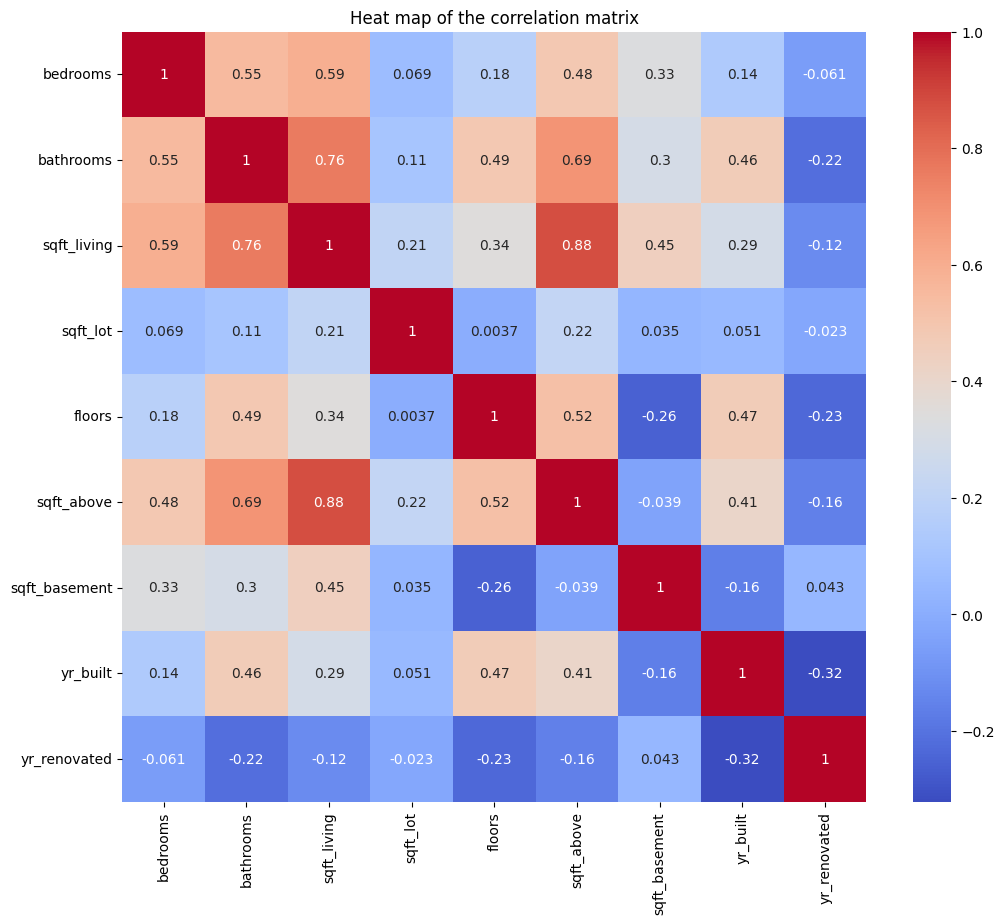

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("Heat map of the correlation matrix")
plt.show()

In [101]:
df_corr.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [102]:
df_corr.iloc[0,1]

np.float64(0.5459199258493334)

In [103]:
(df_corr.iloc[2,3:]>0.5).sum()

np.int64(1)

In [104]:
df_corr.shape[0]

9

In [110]:
cols = df_corr.columns
cols_after_corr = list(cols)

for i in range(df_corr.shape[0]):
    if ((df_corr.iloc[i,i+1:].abs()>0.5).sum()>0.1):
        cols_after_corr.remove(cols[i])
        print("Removing",cols[i])

print(len(cols_after_corr))
cols_after_corr


Removing bedrooms
Removing bathrooms
Removing sqft_living
Removing floors
5


['sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [111]:
df_features_after_corr = df_features[cols_after_corr]
df_features_after_corr.head()

,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated
0,7912,1340,0,1955,2005
1,9050,3370,280,1921,0
2,11947,1930,0,1966,0
3,8030,1000,1000,1963,0
4,10500,1140,800,1976,1992


In [112]:
df_features_after_corr.shape

(4600, 5)

In [113]:
df_corr = df_features_after_corr.corr()

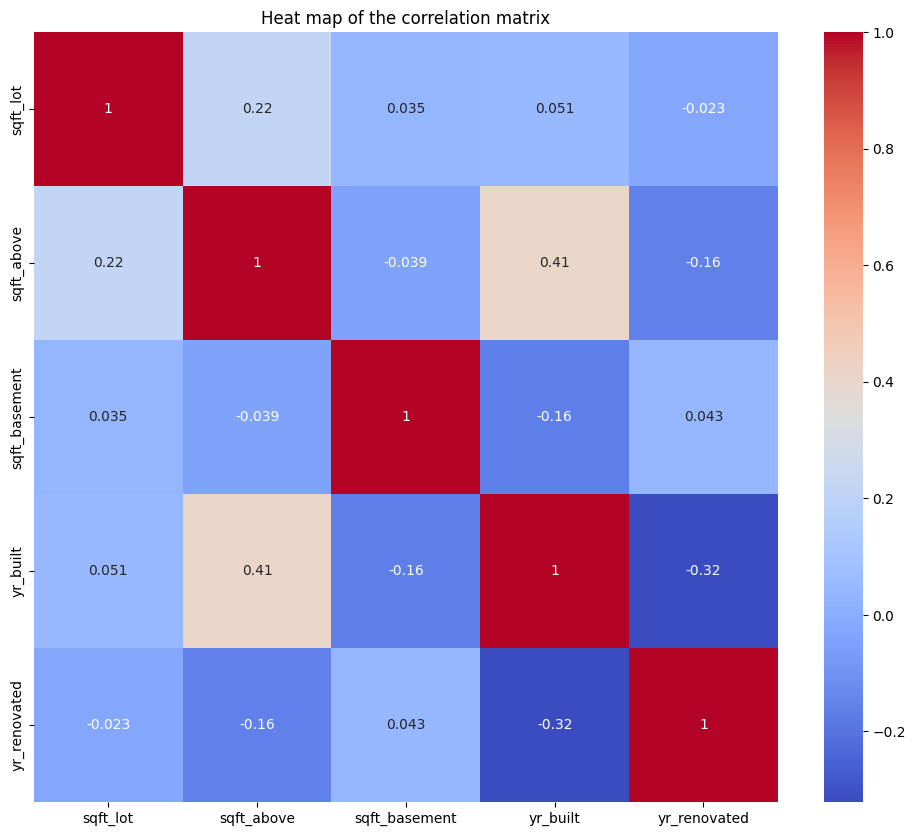

In [91]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title("Heat map of the correlation matrix")
plt.show()

# __Assisted Practice__

## __Problem Statement:__
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to understand and visualize the relationships within the Iris dataset.

## __Steps to Perform:__
- Understand the Dataset: Get familiar with the Iris dataset and its features
- Engineer Features: Create new features like sepal area and petal area
- Transform Variables: If the features are not normally distributed, apply transformations
- Scale Features: Use Min-Max Scaling or standard scaling to scale the features
- Encode Labels: Convert the categorical data (species) into numerical data using label encoding
- One Hot Encoding: Apply one hot encoding on the species feature and compare with label encoding